x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0242 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0114 - val_loss: 0.0104
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875

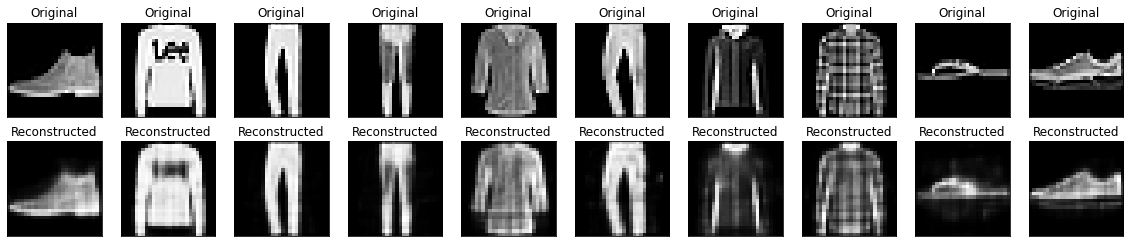

In [2]:
# Importing necessary libraries
# TensorFlow is used for building the autoencoder model, while 
# matplotlib is used for plotting images, and NumPy is used for numerical operations.
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the dataset
# Fashion MNIST is used here, consisting of 28x28 grayscale images. 
# We normalize the pixel values to the range [0, 1] by dividing by 255.
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.  # Normalize training data
x_test = x_test.astype('float32') / 255.    # Normalize test data

# Print the shape of the datasets to confirm they are loaded correctly
print(f"x_train shape: {x_train.shape}")  # Expected: (60000, 28, 28)
print(f"x_test shape: {x_test.shape}")    # Expected: (10000, 28, 28)

# Define the Autoencoder using Keras Model Subclassing API
# This class structure gives us flexibility to customize both the encoder and decoder.

class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        # The constructor method initializes the encoder and decoder networks
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim  # The size of the latent space (compressed representation)
        self.shape = shape  # Shape of the input data (in this case, 28x28 images)

        # The encoder is a simple Sequential model that flattens the input and
        # maps it to the latent dimension using a Dense (fully connected) layer.
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),  # Flattens the 28x28 image into a vector of 784 values
            layers.Dense(latent_dim, activation='relu'),  # Encodes to 'latent_dim' dimensions
        ])

        # The decoder is also a Sequential model that reconstructs the image from the latent space.
        self.decoder = tf.keras.Sequential([
            layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),  # Reconstructs from latent space to original size
            layers.Reshape(shape)  # Reshapes the flat vector back to the original 28x28 image format
        ])

    # The call method defines the forward pass of the model.
    # It first encodes the input and then decodes the encoded representation.
    def call(self, x):
        encoded = self.encoder(x)  # Pass input through the encoder to get latent representation
        decoded = self.decoder(encoded)  # Pass the latent representation through the decoder to reconstruct the input
        return decoded  # Return the reconstructed input

# Define the input shape and latent space size (compressed representation size)
shape = x_test.shape[1:]  # Shape of the input data (28x28 images)
latent_dim = 64  # The size of the latent space (you can adjust this to control compression)
autoencoder = Autoencoder(latent_dim, shape)  # Initialize the autoencoder

# Compile the model with the Adam optimizer and Mean Squared Error (MSE) loss function
# MSE is used as the loss since we are comparing the original input to the reconstructed output.
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Train the autoencoder on the training data
# We use 'x_train' as both the input and the target since autoencoders aim to reconstruct the input.
autoencoder.fit(x_train, x_train,
                epochs=10,  # Number of training epochs
                shuffle=True,  # Shuffle data at the beginning of each epoch
                validation_data=(x_test, x_test))  # Use test data for validation

# After training, we encode and decode the test data to visualize the results.
encoded_imgs = autoencoder.encoder(x_test).numpy()  # Get the encoded representations
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()  # Reconstruct the test images from the encoded representations

# Visualize the results: comparing original vs reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))  # Create a figure for plotting

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)  # Create subplots
    plt.imshow(x_test[i], cmap='gray')  # Show the original image
    plt.title("Original")
    ax.get_xaxis().set_visible(False)  # Hide the x-axis
    ax.get_yaxis().set_visible(False)  # Hide the y-axis

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)  # Create subplots for reconstructed images
    plt.imshow(decoded_imgs[i], cmap='gray')  # Show the reconstructed image
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)  # Hide the x-axis
    ax.get_yaxis().set_visible(False)  # Hide the y-axis

plt.show()  # Display the plot

## Second example: Image denoising